In [1]:
# print out each line in the input cell not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expand the cell width to 100% of t 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

*Gruppe: Tobias Blümlhuber, Silvan Kron, Simon Gärtner*

# Aufgabe 1: Leiteraufgabe
## Renovierung eines Gutshofes 

Ein alter Gutshof wird renoviert. Dabei soll der Buntsandstein in der Scheune frei gelegt werden, indem der Putz von den 7,80m hohen Wänden abgeschlagen wird. Auf dem Boden der Scheune liegen allerdings noch andere Materialien im Weg, die nicht verschoben werden können. So steht eine würfelförmige Kiste direkt an der Wand mit der Seitenlänge von 1,60m. Reicht eine 6,50m lange Leiter, die an der Wand anlehnt und die Kiste in einem Punkt berührt aus, um den Putz an der kompletten Wand abzuschlagen?

### Skizze für besseres Verständis des Problems

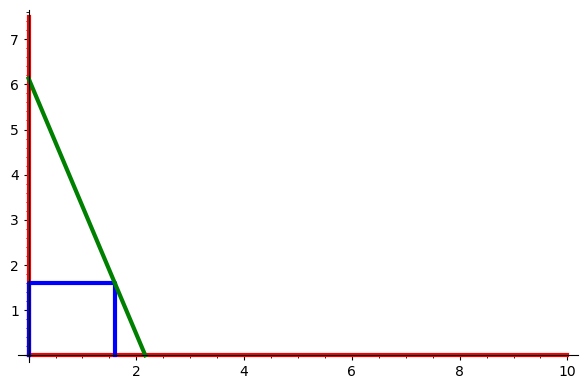

In [2]:
wall = line([(0,0),(0,7.5)], color = 'red', thickness = 3)
floor = line([(0,0),(10,0)], color = 'red', thickness = 3)

chest = line([(0,0), (0,1.6), (1.6, 1.6), (1.6,0)], color = 'blue', thickness = 3)

ladder = line([(2.165,0), (0,6.1287)], color = 'green', thickness = 3)

show(wall + floor + chest + ladder)

**Gegebene Maße**

Kiste: Würfelförmig 1.60m x 1.60m (blauer Würfel)

Leiter: 6.50m lang, liegt an der Wand an und an einer Ecke des Würfels (grüne Linie)

Wand: 7.80m hoch (rote y-Achse)

### Ziel der Berechnung

*Ist die volle Höhe der Wand durch die Leiter und einen darauf stehenden Menschen erreichbar?*

$\quad \rightarrow$ Um diese Frage zu beantworten berechnen wir den höchsten Punkt an dem die Leite anliegen könnte.

### Vorgehen

1. Mittels Strahlensatz die Maße des großen Dreicke berechnen. Hierfür setzen wir das Verhältnis des mittleren oberen Dreiecks (auf der Kiste) mit dem großen Dreieck in Verhältnis. Ziel ist es dabei den Alnagepunkt der Leiter zu berechnen

Stahlensatz:

In [3]:
x, y = var('x', 'y')

In [4]:
x / 1.6 == y / (y-1.6)

x == y / (y-1.6) * 1.6

0.625000000000000*x == y/(y - 1.60000000000000)

x == 1.60000000000000*y/(y - 1.60000000000000)

Nun erhält man eine Gleichung mit zwei Unbekannten: 

1. x $\rightarrow$ Abstand von der Wand zum Standpunkt der Leiter (Schnittpunkt mit x-Achse)
2. y $\rightarrow$ Anlagepunkt der Leiter an der Wand (Schnittpunkt mit y-Achse)

Um die Gleichung zu lösen, benötigen wir noch eine zweite Gleichung: Pythagoras des großen Dreiecks

In [5]:
6.50^2 == y^2 - x^2

y == sqrt(6.5^2-x^2)

42.2500000000000 == -x^2 + y^2

y == sqrt(-x^2 + 42.2500000000000)

Nun können wir die Gleichungen ineinander einsetzen und erhalten ein Ergebnis.

In [6]:
solve(sqrt(6.5^2-(y/(y-1.6)*1.6)^2) == y, y)

[y == 1/2*sqrt((3969*y^2 - 13520*y + 10816)/(25*y^2 - 80*y + 64))]

Da sageMath hier kein Ergebnis liefert, WolframAlpha aber schon, rechnen wir mit folgendem Ergebnis aus WolframAlpha weiter:

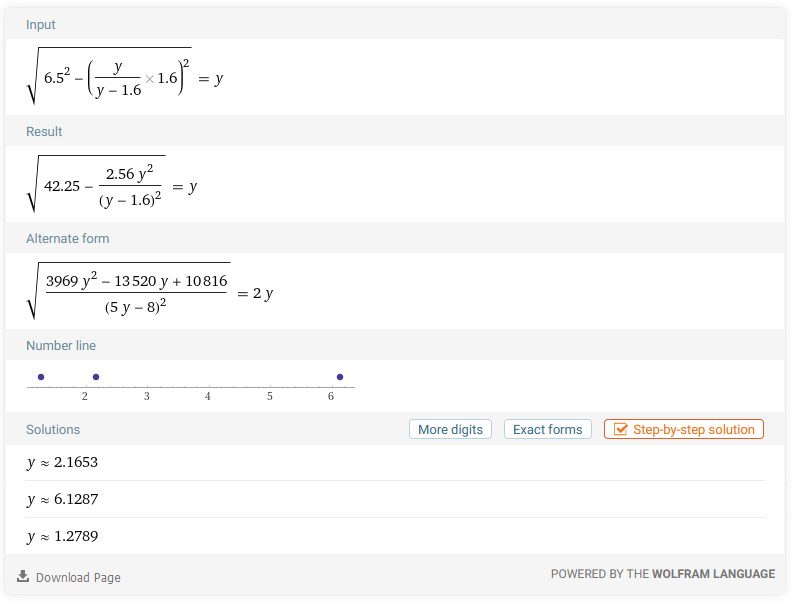

Das einzige Ergebnis, das logisch von Bedeutung ist, ist: $y \approx 6.1287$

Dies bedeutet, das unser Alagepunkt bei einer 6.50m langen Leiter bei $\approx 6.1287m$ liegt.

### Kontrollrechnung

Um das Ergebnis zu überprüfen berechnen wir uns des Weiteren noch den Standpunkt der Leiter, um dann die Leiterlänge auszurechnen, wenn diese bei 6.50m liegt, dann ist das Ergebnis richtig. Um den Standpunkt auszurechnen verwenden wir die Formel aus dem Strahlensatz von oben.

In [7]:
x = 6.1287 / (6.1287 - 1.6) * 1.6
x

2.16528363548038

Der Standpunkt der Leiter liegt bei $\approx 2.165m$. Mit dieser Angabe könnnen wir nun über den Pythagoras die Länge der Leiter ausrechnen. Um genau zu prüfen Berechnen wir auch die Abweichung von der gegebenen Leiterlänge.

In [8]:
r, a = var('r', 'a')

r = sqrt(2.165^2+6.1287^2)
a = 6.50 - r

print('Abweichung: ' + str(a))

Abweichung: 0.000139333031822453


Die Abbweichung von 0.0001... lässt sich durch das Runden der Maße erklären.

### Fazit

Um nun die Erreichbarkeit der Decke zu prüfen. Müssen eine Reihe von Annahmen getroffen werden:

1. Größe der Person: Wir haben festgelegt, dass die Person durch ihre Körpergröße und das ausstrecken der Arme nach oben eine Höhe von 2.10m abdecken kann
2. Sicherheit: Ebenso haben wir festgelegt, dass die Person nicht auf der Spitze der Leiter steht, sondern 0.30m unter der Spitze.

Mittels dieser Annahmen können wir nun berechnen, ob die Person die Decke erreicht.

In [9]:
h = var('h')

h = 6.1287 - 0.30 + 2.10

print('Maximale Höhe:' + str(h))
h > 7.80

Maximale Höhe:7.92870000000000


True

Da die maximal erreichbare Höhe bei $\approx 8m$ liegt, erreicht die Person die Decke!